In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/NLP

/content/drive/MyDrive/Colab_Notebooks/NLP


In [ ]:
import pandas as pd

df = pd.read_csv('./final_data/en_US.twitter.txt', error_bad_lines=False)
print (df)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Skipping line 2236216: expected 2 fields, saw 3
Skipping line 2236227: expected 2 fields, saw 4
Skipping line 2236231: expected 2 fields, saw 4
Skipping line 2236284: expected 2 fields, saw 3
Skipping line 2236304: expected 2 fields, saw 3
Skipping line 2236311: expected 2 fields, saw 3
Skipping line 2236367: expected 2 fields, saw 3
Skipping line 2236417: expected 2 fields, saw 3
Skipping line 2236426: expected 2 fields, saw 4
Skipping line 2236427: expected 2 fields, saw 5
Skipping line 2236443: expected 2 fields, saw 3
Skipping line 2236458: expected 2 fields, saw 4
Skipping line 2236461: expected 2 fields, saw 3
Skipping line 2236472: expected 2 fields, saw 3
Skipping line 2236487: expected 2 fields, saw 3
Skipping line 2236491: expected 2 fields, saw 5
Skipping line 2236520: expected 2 fields, saw 3
Skipping line 2236530: expected 2 fields, saw 3
Skipping line 2236535: expected 2 fields, saw 4
Skipping line 2236572: expected

        How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way  \
0        When you meet someone special... you'll know. ...                                               
1                 they've decided its more fun if I don't.                                               
2        So Tired D; Played Lazer Tag & Ran A LOT D; Ug...                                               
3        Words from a complete stranger! Made my birthd...                                               
4        First Cubs game ever! Wrigley field is gorgeou...                                               
...                                                    ...                                               
2182800                    and u didnt give it to him? lol                                               
2182801  what's good. I see the success you got poppin ...                                               
2182802  RT : Consumers are visual. They want 

In [ ]:
from google.colab import files

# Upload the text file
# uploaded = files.upload()

# Specify the file name
file_name = './final_data/en_US.twitter.txt'

# Read the contents of the file
with open(file_name, 'r') as file:
    contents = file.read()

# Print the contents of the file
print(contents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pickle

In [ ]:
with open('output.txt', 'w') as file:
    file.write(contents)

In [ ]:
data = '''
How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.
When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.
they've decided its more fun if I don't.
So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)
Words from a complete stranger! Made my birthday even better :)
First Cubs game ever! Wrigley field is gorgeous. This is perfect. Go Cubs Go!
i no! i get another day off from skool due to the wonderful snow (: and THIS wakes me up...damn thing
'''

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer,open('token.pk1','wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[19, 20, 1, 21, 22, 4, 5, 23, 1, 24, 25, 6, 26, 27, 28]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print (vocab_size)

93


In [ ]:
sequences = []
for i in range(1,len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)
print ("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  111


array([[19, 20,  1, 21],
       [20,  1, 21, 22],
       [ 1, 21, 22,  4],
       [21, 22,  4,  5],
       [22,  4,  5, 23],
       [ 4,  5, 23,  1],
       [ 5, 23,  1, 24],
       [23,  1, 24, 25],
       [ 1, 24, 25,  6],
       [24, 25,  6, 26]])

In [ ]:
x = []
y = []

for i in sequences:
  x.append(i[0:3])
  y.append(i[3])

x = np.array(x)
y = np.array(y)

In [ ]:
print ("Data: ",x[:10])
print ("Response: ",y[:10])

Data:  [[19 20  1]
 [20  1 21]
 [ 1 21 22]
 [21 22  4]
 [22  4  5]
 [ 4  5 23]
 [ 5 23  1]
 [23  1 24]
 [ 1 24 25]
 [24 25  6]]
Response:  [21 22  4  5 23  1 24 25  6 26]


In [ ]:
y = to_categorical(y,num_classes = vocab_size)
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000,return_sequences = True))
model.add(LSTM(1000))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(vocab_size,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             930       
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 93)                93093     
                                                                 
Total params: 13143023 (50.14 MB)
Trainable params: 13143023 (50.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%pip install keras

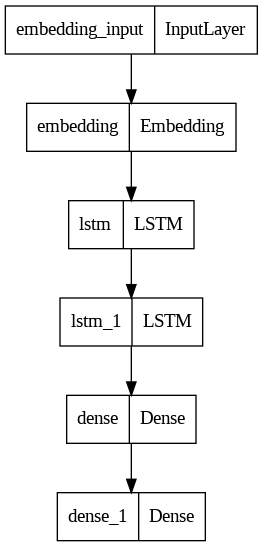

In [ ]:
from tensorflow import keras
from keras.utils import plot_model

keras.utils.plot_model(model,to_file='plot.png',show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

checkpoint = ModelCheckpoint("next_words.h5",monitor = 'loss', verbose = 1, save_best_only = True)
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate = 0.001))
model.fit(x,y,epochs = 70, batch_size=64,callbacks=[checkpoint])

Epoch 1/70
2/2 [==============================] - ETA: 0s - loss: 4.5336
Epoch 1: loss improved from inf to 4.53357, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 10s 1s/step - loss: 4.5336
Epoch 2/70
1/2 [==============>...............] - ETA: 0s - loss: 4.5309
Epoch 2: loss improved from 4.53357 to 4.53131, saving model to next_words.h5
2/2 [==============================] - 1s 733ms/step - loss: 4.5313
Epoch 3/70
1/2 [==============>...............] - ETA: 0s - loss: 4.5281
Epoch 3: loss improved from 4.53131 to 4.52825, saving model to next_words.h5
2/2 [==============================] - 1s 655ms/step - loss: 4.5282
Epoch 4/70
2/2 [==============================] - ETA: 0s - loss: 4.5238
Epoch 4: loss improved from 4.52825 to 4.52376, saving model to next_words.h5
2/2 [==============================] - 2s 2s/step - loss: 4.5238
Epoch 5/70
2/2 [==============================] - ETA: 0s - loss: 4.5153
Epoch 5: loss improved from 4.52376 to 4.51532, saving model to next_words.h5
2/2 [==============================] - 1s 533ms/step - loss: 4.5153
Epoch 6/70
2/2 [==============================] - ETA: 0s - l

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pk1','rb'))

def Predict_Next_Words(model,tokenizer,text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break
  print (predicted_word)
  return predicted_word

In [ ]:
while True:

  text = str(input("Enter your line: "))

  if text == "0":
    print ("Execution completed ...")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print (text)

      Predict_Next_Words(model,tokenizer,text)
    except Exception as e:
      print ('Error occurred: ',e)
      continue

Enter your line: hello
['hello']
Error occurred:  in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
  

In [ ]:


# Example Data
sentences = [
    "The sky is blue.",
    "The sun is shining.",
    "The cat is sleeping.",
    "The dog is barking.",
    "The bird is singing."
]

# Preprocess the Data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(sentences)

x_train = []
y_train = []

for seq in sequences:
    words = [tokenizer.index_word[idx] for idx in seq]
    for i in range(1, len(words)):
        n_gram_sequence = words[:i+1]
        x_train.append(n_gram_sequence[:-1])
        y_train.append(tokenizer.word_index[n_gram_sequence[-1]])


# Convert text sequences to integer sequences
x_train = tokenizer.texts_to_sequences(x_train)
y_train = np.array(y_train)

# Pad sequences
max_sequence_length = max([len(seq) for seq in x_train])
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='pre', truncating='pre')
print (x_train)
print (y_train)

# # Build the LSTM Model
# embedding_dim = 100
# lstm_units = 128

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
# model.add(LSTM(lstm_units))
# model.add(Dense(vocab_size, activation='softmax'))

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# # Train the LSTM Model
# epochs = 10
# batch_size = 32

# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# # Generate Sentences
# def generate_sentences(start_word, num_sentences):
#     generated_sentences = []
#     current_word = start_word.lower()

#     for _ in range(num_sentences):
#         sentence = [current_word]
#         while len(sentence) < max_sequence_length:
#             input_sequence = pad_sequences([[tokenizer.word_index[word] for word in sentence]], maxlen=max_sequence_length, padding='pre', truncating='pre')
#             predicted_word_index = np.argmax(model.predict(input_sequence)[0][-1])
#             predicted_word = tokenizer.index_word.get(predicted_word_index, '<OOV>')  # Use '<OOV>' as fallback for OOV words
#             sentence.append(predicted_word)
#             if predicted_word == '.':
#                 break

#         generated_sentences.append(' '.join(sentence))
#         current_word = start_word.lower()

#     return generated_sentences

# start_word = 'the'
# num_sentences = 5

# generated_sentences = generate_sentences(start_word, num_sentences)

# for sentence in generated_sentences:
#     print(sentence)

[[ 0  0  1]
 [ 0  1  3]
 [ 1  3  2]
 [ 0  0  1]
 [ 0  1  5]
 [ 1  5  2]
 [ 0  0  1]
 [ 0  1  7]
 [ 1  7  2]
 [ 0  0  1]
 [ 0  1  9]
 [ 1  9  2]
 [ 0  0  1]
 [ 0  1 11]
 [ 1 11  2]]
[ 3  2  4  5  2  6  7  2  8  9  2 10 11  2 12]


In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._collect_words(node, prefix)

    def _collect_words(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        for char, child_node in node.children.items():
            words.extend(self._collect_words(child_node, prefix + char))
        return words

    def complete_and_fix_word(self, word):
        completions = self.starts_with(word)
        if completions:
            return completions[0]
        else:
            return self._fix_word(word)

    def _fix_word(self, word):
        candidates = self.starts_with(word[0])
        min_distance = float('inf')
        best_match = ''

        for candidate in candidates:
            distance = self._edit_distance(word, candidate)
            if distance < min_distance:
                min_distance = distance
                best_match = candidate

        return best_match

    def _edit_distance(self, word1, word2):
        m, n = len(word1), len(word2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

        return dp[m][n]


# Example usage:
trie = Trie()
words = ["apple", "banana", "orange"]
for word in words:
    trie.insert(word)

word = "appl"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)  # Output: "apple"

word = "banan"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)  # Output: "banana"

word = "o"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)  # Output: "orange"

apple
banana
orange


In [ ]:
import nltk
from nltk.util import ngrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm import MLE

# Chuẩn bị dữ liệu huấn luyện
text = "This is a sample sentence used for language modeling."
tokenized_text = nltk.word_tokenize(text)
n = 3  # Sử dụng trigram

# Tạo các n-gram từ dữ liệu huấn luyện
ngrams_data = list(ngrams(pad_both_ends(tokenized_text, n), n))

# Mô hình ngôn ngữ sử dụng Maximum Likelihood Estimation (MLE)
model_mle = MLE(n)
model_mle.fit(ngrams_data)

# Tính xác suất của một câu
sentence = "This is a sample sentence."
tokenized_sentence = nltk.word_tokenize(sentence)

prob = 1.0
for i in range(len(tokenized_sentence) - n + 1):
    context = tokenized_sentence[i:i+n-1]
    token = tokenized_sentence[i+n-1]
    prob *= model_mle.score(token, context)

print(f"Xác suất của câu '{sentence}' là: {prob}")

ValueError: ignored